In [1]:
#Importing Basic Libraries
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import re

#Importing NLTk and side packages
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

In [2]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('indian')

nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package indian to /root/nltk_data...
[nltk_data]   Unzipping corpora/indian.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [3]:
data = pd.read_csv("chatbot_data_nlp.csv")

In [4]:
data.head()

response_id        class                                      response_text  \
0  response_1  not_flagged              I try and avoid this sort of conflict   
1  response_2      flagged  Had a friend open up to me about his mental ad...   
2  response_3      flagged  I saved a girl from suicide once. She was goin...   
3  response_4  not_flagged  i cant think of one really...i think i may hav...   
4  response_5  not_flagged  Only really one friend who doesn't fit into th...   

  Unnamed: 3  Unnamed: 4 Unnamed: 5  Unnamed: 6 Unnamed: 7  
0        NaN         NaN        NaN         NaN        NaN  
1        NaN         NaN        NaN         NaN        NaN  
2        NaN         NaN        NaN         NaN        NaN  
3        NaN         NaN        NaN         NaN        NaN  
4                    NaN        NaN         NaN        NaN

In [ ]:
data.shape

(80, 8)

In [5]:
#Taking Only necessary Data and removing unneccessary columns
data = data.iloc[:,1:3]
data


class                                      response_text
0   not_flagged              I try and avoid this sort of conflict
1       flagged  Had a friend open up to me about his mental ad...
2       flagged  I saved a girl from suicide once. She was goin...
3   not_flagged  i cant think of one really...i think i may hav...
4   not_flagged  Only really one friend who doesn't fit into th...
..          ...                                                ...
75  not_flagged  Now that I've been through it, although i'm no...
76      flagged  when my best friends mom past away from od'ing...
77  not_flagged  As a camp counselor I provide stability in kid...
78      flagged  My now girlfriend used to have serious addicti...
79  not_flagged  The one person I ever talked to it was because...

[80 rows x 2 columns]

In [6]:
data['response_text'][0]

'I try and avoid this sort of conflict'

In [7]:
X= data['response_text']
y=data['class']

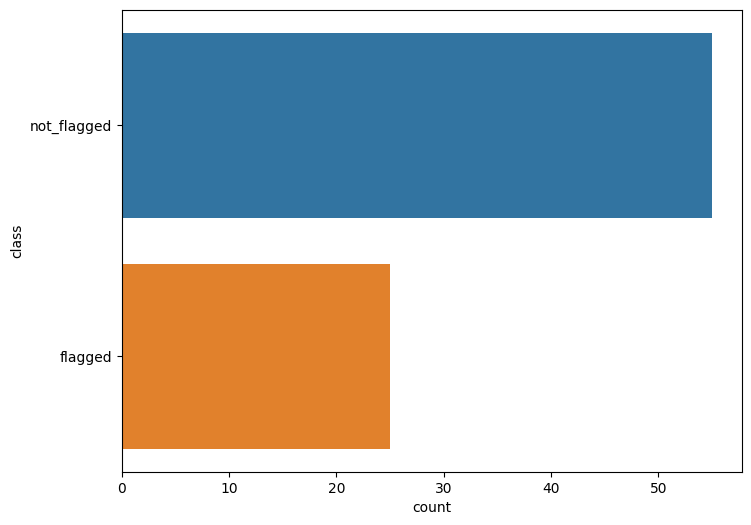

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(y=y)
plt.show()

In [9]:
#creating the Stemmer
ls = LancasterStemmer()
# Creating a function that does all Preprocessing things in a single go
def clean_text(sent):
    token1 = word_tokenize(sent) #tokenizing the sentences
    #token2 = [x.lower() for x in token1 if x not in string.punctuation] #Removing the punctuations
    token2 = [x.lower() for x in token1 if x.isalpha() or x.isdigit()] #Removing the punctuations
    token3 = [ls.stem(x) for x in token2 if x not in stopwords.words('english')] #removing affixes
    return token3


In [10]:
#Vectorizing the data using following Vectorizier
from sklearn.feature_extraction.text import TfidfVectorizer

#Initiating the Vectorizer
tfidf = TfidfVectorizer(analyzer=clean_text)
#analyzer will take care of all the preprocessing

#Fiting data to the vectorizer
x_vect = tfidf.fit_transform(X)

#Checking the Dimentionality
x_vect

<80x452 sparse matrix of type '<class 'numpy.float64'>'
	with 974 stored elements in Compressed Sparse Row format>

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x_vect,y,random_state=0,stratify=y,test_size=0.1)

X_train.shape,X_test.shape

((72, 452), (8, 452))

In [17]:
#we are using SVMvalued customer	I am pleased to advise you that following rec
from sklearn.svm import SVC

#Initiating the Model
classifier = SVC(kernel='linear')

#fiting the data to the model
classifier.fit(X_train,y_train)


SVC(kernel='linear')

In [18]:
#Testing the model on test data
y_pred = classifier.predict(X_test)

In [19]:
#Caltulating the Accuracy
from sklearn.metrics import accuracy_score

print("accuracy of the model is :",accuracy_score(y_test,y_pred))

accuracy of the model is : 0.625


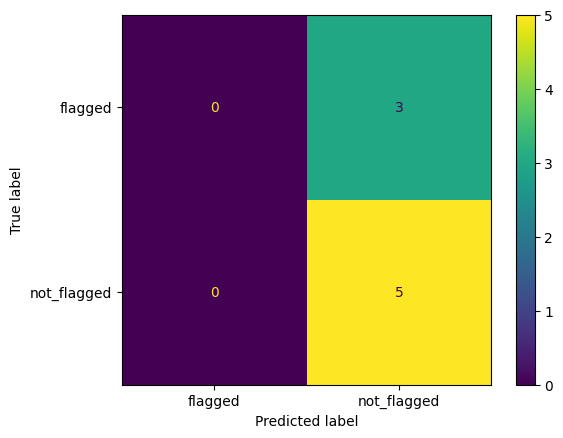

In [20]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
#cm= confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)